# 0/ Download the data

In [1]:
!wget https://raw.githubusercontent.com/the0nlyWyvern/Top_tracks_in_Vietnam/main/data/cleanedData/top_tracks_by_artist_cleaned.csv

--2023-01-30 08:56:45--  https://raw.githubusercontent.com/the0nlyWyvern/Top_tracks_in_Vietnam/main/data/cleanedData/top_tracks_by_artist_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200941 (196K) [text/plain]
Saving to: ‘top_tracks_by_artist_cleaned.csv’

top_tracks_by_artis 100%[===================>] 196.23K  --.-KB/s    in 0.03s   

2023-01-30 08:56:46 (6.56 MB/s) - ‘top_tracks_by_artist_cleaned.csv’ saved [200941/200941]



# 1/ Library

In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2/ Load data into dataframe

In [3]:
tracks_df = pd.read_csv('top_tracks_by_artist_cleaned.csv', encoding = 'utf-8')
tracks_df.head(5)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,2QeCJM7ZmVS8xwjjaHahhv,Tân Cổ Cánh Hoa Yêu,Vọng Cổ Việt Nam,88,[],Tân Cổ Cánh Hoa Yêu,2021-05-11,1,461,False,15
1,4qlh8lE1HAK9QhO6hYpu9A,Tân Cổ Ru Nửa Vầng Trăng,Vọng Cổ Việt Nam,88,[],Tân Cổ Ru Nửa Vầng Trăng,2021-01-11,1,517,False,11
2,0W5IsXzhv7l690pNXLQFeM,Tân Cổ Sao Út Nỡ Vội Lấy Chồng,Vọng Cổ Việt Nam,88,[],Tân Cổ Sao Út Nỡ Vội Lấy Chồng,2021-01-11,1,530,False,10
3,6JEJawcNecNh6W1fb4a6qE,Tân Cổ Con Đò Lỡ Hẹn,Vọng Cổ Việt Nam,88,[],Tân Cổ Con Đò Lỡ Hẹn,2021-10-11,1,558,False,10
4,5k0wsqLadgNbxv5nNl0tlb,Tân Cổ Buồn Trong Kỷ Niệm,Vọng Cổ Việt Nam,88,[],Tân Cổ Buồn Trong Kỷ Niệm,2021-10-11,1,556,False,9


## 2.1/ Change column data type

We had handled this in the last part, so we gonna skip this

In [4]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], format='%Y-%m-%d');

In [5]:
tracks_df['artist_genres'] = tracks_df['artist_genres'].apply(literal_eval)

# 3/ Question 1: Which genre has inappropriate lyrics for children?

Benefits of answering this question:
- Spotify understands these genres to limit suggestions for users under a certain age (eg 18 years old, 12 years old)

In [6]:
tracks_df[tracks_df['explicit'] == True]['artist_genres']

197     [indie viet, v-pop, vietnamese hip hop, vietna...
201                                                    []
202                                                    []
203                                                    []
204                                                    []
                              ...                        
1447                             [vietnamese melodic rap]
1452                                 [vietnamese hip hop]
1458         [vietnamese hip hop, vietnamese melodic rap]
1463         [vietnamese hip hop, vietnamese melodic rap]
1465         [vietnamese hip hop, vietnamese melodic rap]
Name: artist_genres, Length: 71, dtype: object

In [7]:
genres = tracks_df[tracks_df['explicit'] == True]['artist_genres'].tolist()

In [8]:
genres = [item for sublist in genres for item in sublist]

In [9]:
genres_counter = Counter(genres)
genres_counter.most_common()

[('vietnamese hip hop', 36),
 ('v-pop', 20),
 ('vietnamese melodic rap', 19),
 ('vietnamese trap', 13),
 ('indie viet', 4),
 ('rock viet', 2),
 ('viet lo-fi', 1),
 ('viet remix', 1)]

## 3.1/ When is the data collected?

In [10]:
release_max = tracks_df[tracks_df['explicit'] == True]['release_date'].max()
release_min = tracks_df[tracks_df['explicit'] == True]['release_date'].min()

print(f'From {release_min.month}-{release_min.year} to {release_max.month}-{release_max.year}')

From 4-2012 to 12-2022


## 3.2/ Visualization

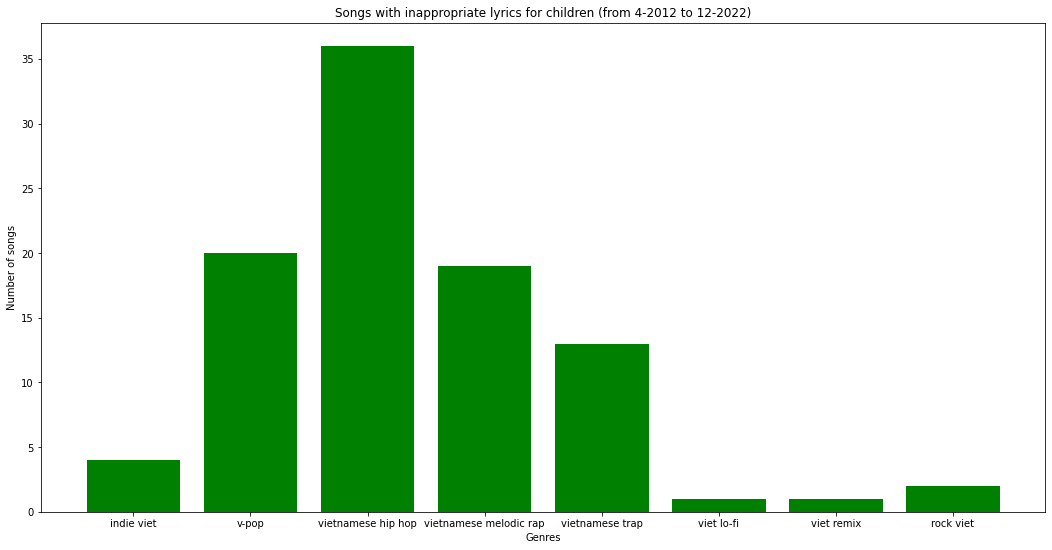

In [27]:
plt.bar(genres_counter.keys(), genres_counter.values(), color ='green', width = 0.8) 
  
plt.xlabel("Genres") 
plt.ylabel("Number of songs") 
plt.title(f"Songs with inappropriate lyrics for children \
(from {release_min.month}-{release_min.year} to {release_max.month}-{release_max.year})")
plt.rcParams['figure.figsize'] = [18, 9]

plt.show() 

## 3.3/ Comments
- Genres __hip hop, v-pop, melodic rap, trap__ have the most number of songs are not suitable for children.
However, this number does not accurately reflect the big picture.
- We need to see what percentage of the above number is the category itself.
- Most of the genres in the above list belong to the youth

## 3.4/ For each of the above genres, what percentage of the songs are not suitable?

In [12]:
inappropriate_genres = dict()
for genre in genres_counter.keys():
    inappropriate_genres[genre] = 0

def match_genre(genres):
    for i in genres:
        if i in inappropriate_genres:
            inappropriate_genres[i] += 1

In [13]:
tracks_df['artist_genres'].apply(match_genre);

In [14]:
inappropriate_genres

{'indie viet': 166,
 'v-pop': 850,
 'vietnamese hip hop': 334,
 'vietnamese melodic rap': 195,
 'vietnamese trap': 50,
 'viet lo-fi': 46,
 'viet remix': 20,
 'rock viet': 37}

In [15]:
genres_percent = dict()
genres = dict(genres_counter)

for i in inappropriate_genres.keys():
    genres_percent[i] = round(genres[i] * 100 / inappropriate_genres[i], 2)
    
genres_percent

{'indie viet': 2.41,
 'v-pop': 2.35,
 'vietnamese hip hop': 10.78,
 'vietnamese melodic rap': 9.74,
 'vietnamese trap': 26.0,
 'viet lo-fi': 2.17,
 'viet remix': 5.0,
 'rock viet': 5.41}

In [16]:
genres_percent = dict(sorted(genres_percent.items(), key=lambda item: item[1], reverse = True))
genres_percent

{'vietnamese trap': 26.0,
 'vietnamese hip hop': 10.78,
 'vietnamese melodic rap': 9.74,
 'rock viet': 5.41,
 'viet remix': 5.0,
 'indie viet': 2.41,
 'v-pop': 2.35,
 'viet lo-fi': 2.17}

## 3.5/ Visualization

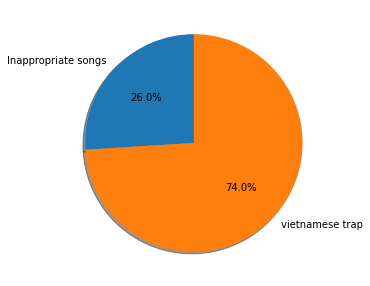

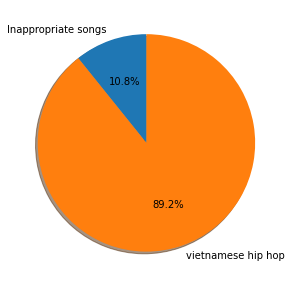

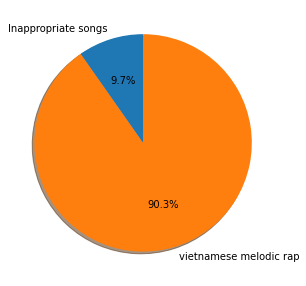

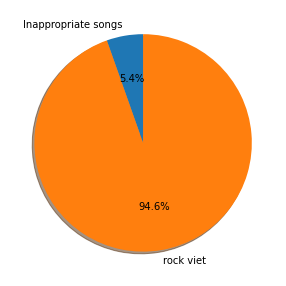

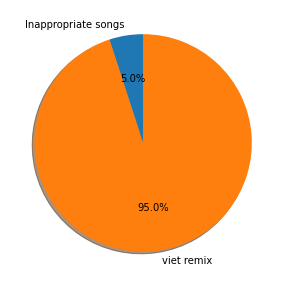

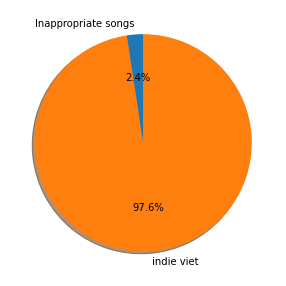

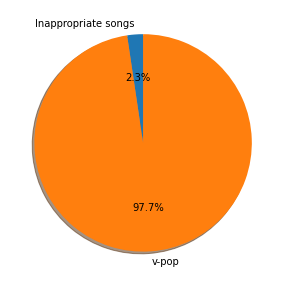

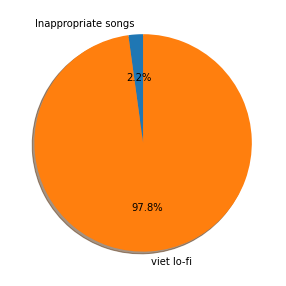

In [17]:
plt.rcParams['figure.figsize'] = [5, 5]

for i in genres_percent:
    plt.pie([genres_percent[i], 100 - genres_percent[i]], labels = ["Inappropriate songs", i], autopct='%1.1f%%', shadow=True, startangle=90)
    plt.show() 

## 3.6/ Comments:

- Compared with the chart above, although __trap__ does not have the most number, it ranks 1<sup>st</sup> in the percentage of songs that are not suitable for children.
- In contrast, __v-pop__ has a relatively low rate even though there are many inappropriate songs.

# 4/ Question 2: Which genres is the most popular one (in terms of quantity and quality)?

### Benefits of answering questions:
- Focusing on advertising these popular genres in the Vietnamese market.
- Invest in music videos of popular artists to maximize profits.

In [18]:
genres_df = tracks_df.explode('artist_genres')

In [19]:
genres_df = genres_df[['artist_genres', 'popularity']]

In [20]:
artist_genres_df = genres_df.groupby('artist_genres').mean('popularity').round(2)

In [21]:
artist_genres_df

,popularity
artist_genres,
indie viet,44.34
rock viet,44.84
v-pop,42.24
viet edm,30.90
viet instrumental,0.00
viet lo-fi,38.26
viet remix,44.85
vietnamese bolero,39.60
vietnamese hip hop,40.40


In [22]:
artist_genres_df_count = genres_df.groupby('artist_genres').count()
artist_genres_df_count

,popularity
artist_genres,
indie viet,166
rock viet,37
v-pop,850
viet edm,10
viet instrumental,8
viet lo-fi,46
viet remix,20
vietnamese bolero,10
vietnamese hip hop,334


In [23]:
artist_genres_df['Number of songs'] = artist_genres_df_count['popularity']
artist_genres_df.sort_values('Number of songs', ascending=False, inplace=True)

In [24]:
artist_genres_df

,popularity,Number of songs
artist_genres,,
v-pop,42.24,850
vietnamese hip hop,40.40,334
vietnamese melodic rap,40.28,195
indie viet,44.34,166
vietnamese singer-songwriter,42.06,90
vietnamese trap,41.22,50
viet lo-fi,38.26,46
rock viet,44.84,37
vinahouse,34.03,30


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8cf9e46d0>,
      dtype=object)

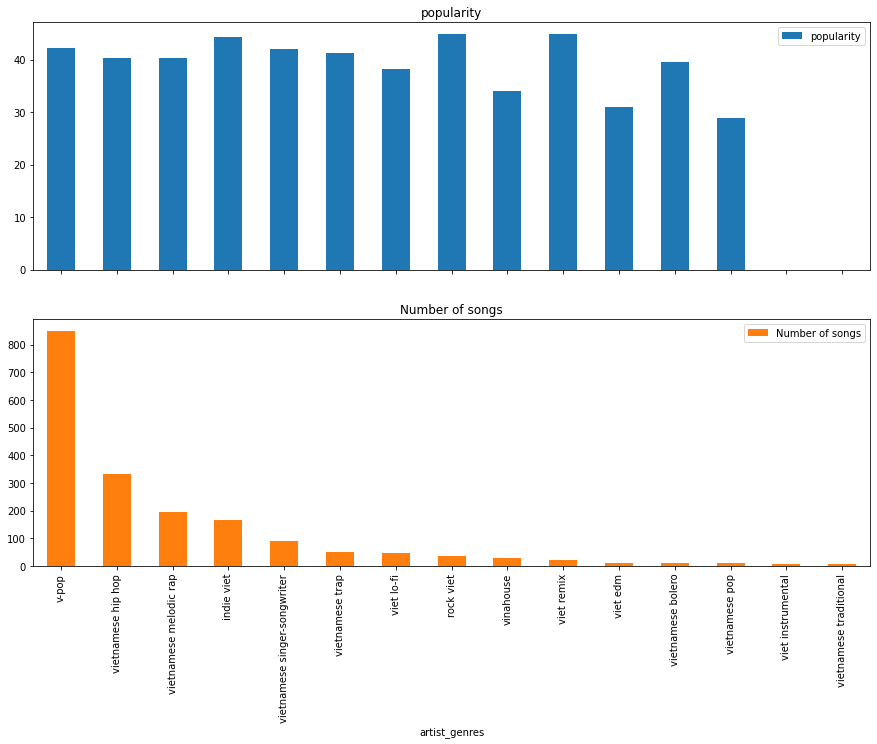

In [25]:
artist_genres_df.plot(kind='bar', figsize=(15,10), subplots=True)

## 4.1 Comments
- __V-pop__ has a far superior number of songs.
- In general, except for __instrumental__ and __traditional__, Vietnamese people listened to a variety of different genres of music, and the popularity between each genres has not changed much.